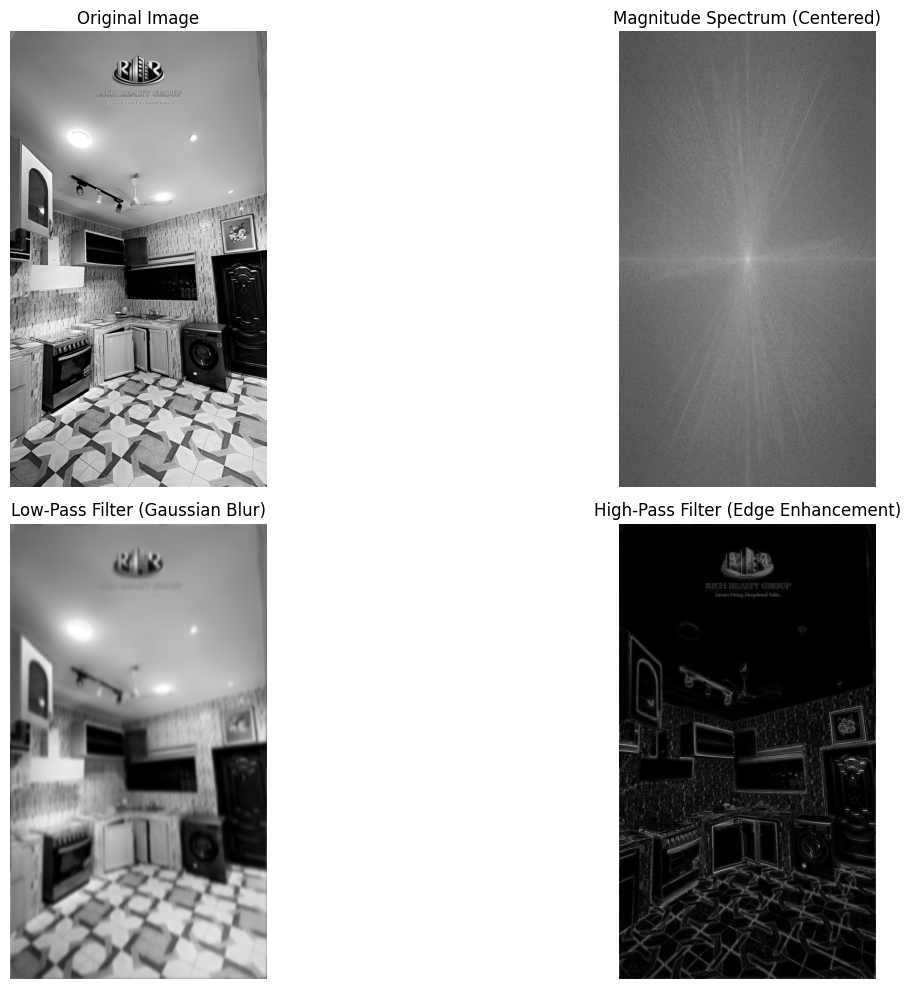

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def frequency_filtering(image_path, cutoff=30, mode='low'):
    """
    Performs Frequency Domain filtering using a Gaussian Mask.
    - cutoff: The radius of the filter (D0).
    - mode: 'low' for blurring, 'high' for edge detection.
    """
    image_path = "./asset/rich6.jpeg" 
    # 1. Load image in grayscale
    img = cv2.imread(image_path, 0)
    if img is None:
        return "Error: Image not found. Please check the path."

    # 2. Convert to Frequency Domain using Fast Fourier Transform (FFT)
    # We use fft2 for 2D images
    dft = np.fft.fft2(img)
    
    # 3. Shift the zero-frequency component to the center of the spectrum
    dft_shift = np.fft.fftshift(dft)

    # 4. Create the Gaussian Filter Mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image
    
    # Generate coordinates grid
    x = np.linspace(0, cols - 1, cols)
    y = np.linspace(0, rows - 1, rows)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Distance D(u,v) from the center
    dist_sq = (X - ccol)**2 + (Y - crow)**2
    
    if mode == 'low':
        # Formula: H(u,v) = exp(-D^2 / 2D0^2)
        mask = np.exp(-dist_sq / (2 * (cutoff**2)))
    else:
        # Formula: HPF = 1 - LPF
        mask = 1 - np.exp(-dist_sq / (2 * (cutoff**2)))

    # 5. Apply the mask to the shifted DFT (Element-wise multiplication)
    f_shift_filtered = dft_shift * mask

    # 6. Inverse Transform: Shift back and apply Inverse FFT
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) # Get the magnitude of the complex result

    # 7. Prepare Magnitude Spectrum for visualization (Log scale)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    return img, magnitude_spectrum, img_back

# --- Execution ---
# Note: Ensure you have an image named 'test_image.jpg' in your directory
# Or use a sample from OpenCV: img_path = cv2.samples.findFile('lena.jpg')

try:
    orig, spec, low_pass = frequency_filtering('test_image.jpg', cutoff=40, mode='low')
    _, _, high_pass = frequency_filtering('test_image.jpg', cutoff=40, mode='high')

    # --- Result Visualization ---
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1), plt.imshow(orig, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(2, 2, 2), plt.imshow(spec, cmap='gray')
    plt.title('Magnitude Spectrum (Centered)'), plt.axis('off')

    plt.subplot(2, 2, 3), plt.imshow(low_pass, cmap='gray')
    plt.title('Low-Pass Filter (Gaussian Blur)'), plt.axis('off')

    plt.subplot(2, 2, 4), plt.imshow(high_pass, cmap='gray')
    plt.title('High-Pass Filter (Edge Enhancement)'), plt.axis('off')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")